In [1]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd
from datetime import date
import scipy.stats as st
import pandas_bokeh
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import DatetimeTickFormatter, HoverTool, ColumnDataSource, Legend, NumeralTickFormatter
from matplotlib.ticker import FuncFormatter

In [2]:
raw = pd.read_csv('Apartment_List_Rent_Estimates_2023_04.csv')
raw.head()

,location_name,location_type,location_fips_code,population,state,county,metro,bed_size,2017_01,2017_02,...,2022_07,2022_08,2022_09,2022_10,2022_11,2022_12,2023_01,2023_02,2023_03,2023_04
0,United States,National,0,324697795,NaN,NaN,NaN,overall,1029.0,1030.0,...,1383,1388,1381,1369,1354,1341,1337,1341,1348,1355
1,United States,National,0,324697795,NaN,NaN,NaN,1br,883.0,884.0,...,1187,1190,1185,1174,1161,1150,1147,1150,1157,1162
2,United States,National,0,324697795,NaN,NaN,NaN,2br,1012.0,1013.0,...,1360,1364,1358,1346,1331,1318,1314,1318,1325,1332
3,California,State,6,39283497,California,NaN,NaN,overall,1559.0,1563.0,...,1998,2005,1997,1976,1947,1925,1915,1921,1932,1941
4,California,State,6,39283497,California,NaN,NaN,1br,1313.0,1317.0,...,1683,1689,1682,1664,1640,1622,1613,1618,1627,1635


In [3]:
#utilize the "melt" function to fetch the dates in the column headers and add them to each row

formatted_df = pd.melt(raw, id_vars=['location_name', 'location_type', 'location_fips_code', 'population', 'state', 'county',
                                    'metro', 'bed_size'], var_name='date', value_name='median_rent_price')
formatted_df.head()

,location_name,location_type,location_fips_code,population,state,county,metro,bed_size,date,median_rent_price
0,United States,National,0,324697795,NaN,NaN,NaN,overall,2017_01,1029.0
1,United States,National,0,324697795,NaN,NaN,NaN,1br,2017_01,883.0
2,United States,National,0,324697795,NaN,NaN,NaN,2br,2017_01,1012.0
3,California,State,6,39283497,California,NaN,NaN,overall,2017_01,1559.0
4,California,State,6,39283497,California,NaN,NaN,1br,2017_01,1313.0


In [4]:
johnson_co_data_df = formatted_df.loc[formatted_df['location_name'] == 'Johnson County, KS']
johnson_co_data_df.head()

,location_name,location_type,location_fips_code,population,state,county,metro,bed_size,date,median_rent_price
822,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",overall,2017_01,1036.0
823,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",1br,2017_01,875.0
824,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",2br,2017_01,1062.0
4200,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",overall,2017_02,1041.0
4201,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",1br,2017_02,878.0


In [5]:
#convert data in date column to a date format recognized by pandas
dates_string = johnson_co_data_df['date']
date_obj = pd.to_datetime(dates_string, format='%Y_%m')
johnson_co_data_df['date'] = date_obj
johnson_co_data_df

C:\Users\nickp\AppData\Local\Temp\ipykernel_12108\2948171459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  johnson_co_data_df['date'] = date_obj


,location_name,location_type,location_fips_code,population,state,county,metro,bed_size,date,median_rent_price
822,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",overall,2017-01-01,1036.0
823,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",1br,2017-01-01,875.0
824,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",2br,2017-01-01,1062.0
4200,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",overall,2017-02-01,1041.0
4201,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",1br,2017-02-01,878.0
...,...,...,...,...,...,...,...,...,...,...
250795,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",1br,2023-03-01,1166.0
250796,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",2br,2023-03-01,1416.0
254172,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",overall,2023-04-01,1402.0
254173,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",1br,2023-04-01,1184.0


Text(0, 0.5, 'price(USD)')

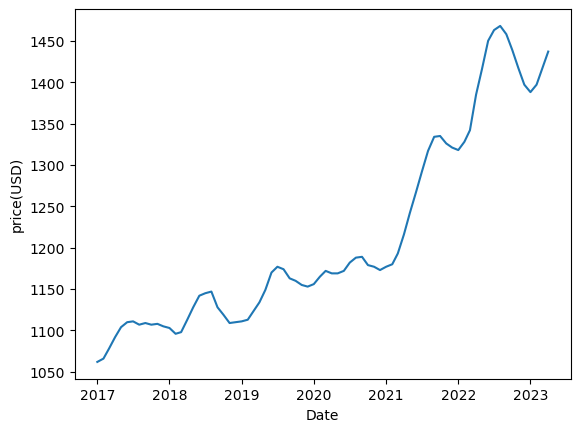

In [6]:
#plot two bedroom median rent prices over time in Johson County

two_bed_df = johnson_co_data_df[johnson_co_data_df['bed_size'] == '2br']
x_axis = two_bed_df['date']
y_axis = two_bed_df['median_rent_price']
plt.plot(x_axis, y_axis)
plt.xlabel('Date')
plt.ylabel('price(USD)')


## List price vs sale price

In [13]:
df = pd.read_csv("JOCO_Median_Prices.csv")
#convert date to date data type
periodbg_unformatted = df['period_begin']
periodend_unformatted = df['period_end']
periodbg_formatted = pd.to_datetime(periodbg_unformatted, format='%m/%d/%Y')
periodend_formatted = pd.to_datetime(periodend_unformatted, format='%m/%d/%Y')
df['period_begin'] = periodbg_formatted
df['period_end'] = periodend_formatted

df_2018 = df.loc[(df['property_type'] =='Single Family Residential') & (df['period_begin'] >='2018-01-01')]

#sort dates
sorted_df_2018 = df_2018.sort_values(by='period_begin')
sorted_df_2018

,period_begin,period_end,property_type,median_sale_price,median_list_price,homes_sold,new_listings,months_of_supply,price_drops
264,2018-01-01,2018-01-31,Single Family Residential,280000.0,276250.0,519.0,664.0,3.1,0.153080
457,2018-02-01,2018-02-28,Single Family Residential,280000.0,299550.0,531.0,761.0,3.0,0.133292
193,2018-03-01,2018-03-31,Single Family Residential,291000.0,299500.0,759.0,1255.0,2.5,0.165962
284,2018-04-01,2018-04-30,Single Family Residential,297000.0,303250.0,856.0,1285.0,2.4,0.191602
117,2018-05-01,2018-05-31,Single Family Residential,300000.0,297750.0,1129.0,1309.0,2.0,0.244971
...,...,...,...,...,...,...,...,...,...
488,2022-11-01,2022-11-30,Single Family Residential,435000.0,390000.0,576.0,429.0,2.1,0.234702
376,2022-12-01,2022-12-31,Single Family Residential,425000.0,400000.0,567.0,331.0,1.9,0.132776
54,2023-01-01,2023-01-31,Single Family Residential,405000.0,425000.0,385.0,495.0,2.7,0.121622
584,2023-02-01,2023-02-28,Single Family Residential,414513.0,415000.0,441.0,513.0,2.4,0.098659


In [8]:
# set output to notebook
output_notebook()

# Create figure for bokeh plot
list_vs_sale_fig = figure(title='Median List Price vs. Sale Price', x_axis_label = 'Date', y_axis_label='Price (USD)',
                         plot_width=1000, plot_height=600)
#plot list price vs sale price

#list price
list_price_glyph = list_vs_sale_fig.line('period_begin', 'median_list_price', source=sorted_df_2018, color='red')

#sale price
sale_price_glyph = list_vs_sale_fig.line('period_begin', 'median_sale_price', source=sorted_df_2018, color='blue')


#add hovertool messages to help identify meaningful datapoints
hover = HoverTool(tooltips=[
        ( 'Date',   '@period_begin{%F}'      ),
        ( 'Sale Price',  '$@median_sale_price' ),
        ( 'List Price', '$@median_list_price')
    ],
                  formatters={
        '@period_begin'        : 'datetime', # use 'datetime' formatter for '@Date' field
        '@median_sale_price' : 'printf', # use 'printf' formatter for '@median_sale_price' field
                                     # use default 'numeral' formatter for other fields
                      '@median_list_price' : 'printf'
    },


    # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline'
)
list_vs_sale_fig.add_tools(hover)


#format x axis ticks to show readable date format
list_vs_sale_fig.xaxis.formatter = DatetimeTickFormatter(days=["%d/%m/%Y"])

#format y axis tick labels
list_vs_sale_fig.yaxis.formatter = NumeralTickFormatter(format='0,0')

#set legend
legend = Legend(items=[
    ("List Price", [list_price_glyph]),
    ("Sale Price", [sale_price_glyph])
])

list_vs_sale_fig.add_layout(legend)

#set legend location
list_vs_sale_fig.legend.location = 'top_left'

#show plot
show(list_vs_sale_fig)

Loading BokehJS ...

## Is right now a buyer or a seller-friendly market?
- This graph helps answer the question "Is right now a good time to buy a home or sell my home?"
- The areas where the sale price exceeds the list price indicates a seller's market, while the areas where the list price exceeds the final sale price indicates a buyer-friendly market. 

- Going off of the most recent data points, it looks like the market is trending toward a seller friendly market once again. 
- If you currently rent, right now is not the best time to be looking to buy a home in Johnson County due to the competition on price.

# Rental Price vs. Median Home price (Sale)

In [9]:
clean_home_data_df = sorted_df_2018.rename(columns={'period_begin' : 'date'})
clean_home_data_df

,date,period_end,property_type,median_sale_price,median_list_price,homes_sold,new_listings,months_of_supply,price_drops
264,2018-01-01,2018-01-31,Single Family Residential,280000.0,276250.0,519.0,664.0,3.1,0.153080
457,2018-02-01,2018-02-28,Single Family Residential,280000.0,299550.0,531.0,761.0,3.0,0.133292
193,2018-03-01,2018-03-31,Single Family Residential,291000.0,299500.0,759.0,1255.0,2.5,0.165962
284,2018-04-01,2018-04-30,Single Family Residential,297000.0,303250.0,856.0,1285.0,2.4,0.191602
117,2018-05-01,2018-05-31,Single Family Residential,300000.0,297750.0,1129.0,1309.0,2.0,0.244971
...,...,...,...,...,...,...,...,...,...
488,2022-11-01,2022-11-30,Single Family Residential,435000.0,390000.0,576.0,429.0,2.1,0.234702
376,2022-12-01,2022-12-31,Single Family Residential,425000.0,400000.0,567.0,331.0,1.9,0.132776
54,2023-01-01,2023-01-31,Single Family Residential,405000.0,425000.0,385.0,495.0,2.7,0.121622
584,2023-02-01,2023-02-28,Single Family Residential,414513.0,415000.0,441.0,513.0,2.4,0.098659


In [10]:
two_bed_df.head()

,location_name,location_type,location_fips_code,population,state,county,metro,bed_size,date,median_rent_price
824,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",2br,2017-01-01,1062.0
4202,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",2br,2017-02-01,1066.0
7580,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",2br,2017-03-01,1078.0
10958,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",2br,2017-04-01,1092.0
14336,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",2br,2017-05-01,1104.0


In [11]:
#merge the two data sets on date
merged_df = pd.merge(clean_home_data_df, two_bed_df, on='date')
merged_df.head()

,date,period_end,property_type,median_sale_price,median_list_price,homes_sold,new_listings,months_of_supply,price_drops,location_name,location_type,location_fips_code,population,state,county,metro,bed_size,median_rent_price
0,2018-01-01,2018-01-31,Single Family Residential,280000.0,276250.0,519.0,664.0,3.1,0.153080,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",2br,1103.0
1,2018-02-01,2018-02-28,Single Family Residential,280000.0,299550.0,531.0,761.0,3.0,0.133292,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",2br,1096.0
2,2018-03-01,2018-03-31,Single Family Residential,291000.0,299500.0,759.0,1255.0,2.5,0.165962,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",2br,1098.0
3,2018-04-01,2018-04-30,Single Family Residential,297000.0,303250.0,856.0,1285.0,2.4,0.191602,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",2br,1113.0
4,2018-05-01,2018-05-31,Single Family Residential,300000.0,297750.0,1129.0,1309.0,2.0,0.244971,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",2br,1128.0


R-Value: 0.9226640176038406


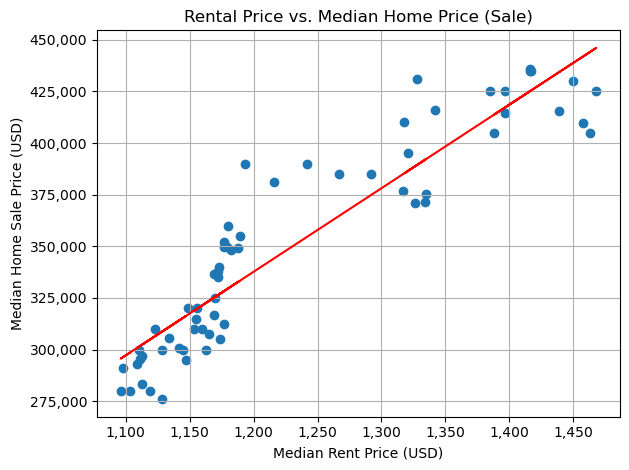

In [12]:
# Perform linear regression and get the r-value
slope, intercept, r_value, p_value, std_err = linregress(merged_df['median_rent_price'], merged_df['median_sale_price'])
print("R-Value:", r_value)

# Create a scatter plot
plt.scatter(merged_df['median_rent_price'], merged_df['median_sale_price'], marker='o')

# Add the regression line to the plot
plt.plot(merged_df['median_rent_price'], intercept + slope * merged_df['median_rent_price'], color='red')

# Set labels and title
plt.xlabel('Median Rent Price (USD)')
plt.ylabel('Median Home Sale Price (USD)')
plt.title('Rental Price vs. Median Home Price (Sale)')

# Define a formatter function to add commas to the tick labels
def format_with_commas(value, pos):
    return "{:,}".format(int(value))

# Apply the custom formatter to the y-axis ticks
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(format_with_commas))

ax.xaxis.set_major_formatter(FuncFormatter(format_with_commas))
# Adjust the plot layout
plt.tight_layout()

#add gridlines
plt.grid(True)

# Display the plot
plt.show()



## How does monthly rent price compare to median home price?
- There is a very strong linear correlation between the median price of homes and the median monthly rent price.
- It makes sense that rent prices would increase as home prices increase. 